In [3]:
#import libraries
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input,VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
#re-size all the images to this
IMAGE_SIZE=[224,224]
 
#Train data(images) path
train_path='C:/Users/vamsi/Jupiternotebook/AI Solution Development/NN/Results/CNN/train'
 
#Test data(images) path
valid_path='C:/Users/vamsi/Jupiternotebook/AI Solution Development/NN/Results/CNN/test'

# Add preprocessing layer to the front of VGG16

In [6]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 
#dont train existing weights
for layer in vgg16.layers:
    layer.trainable=False
    


In [7]:
#Getting number of classes
folders=glob('C:/Users/vamsi/Jupiternotebook/AI Solution Development/NN/Results/CNN/train/*')

In [8]:
len(folders)

2

In [9]:
#Our layers - you can add more layer if you want
x=Flatten()(vgg16.output)
 
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)


# Create a model object

In [10]:
model=Model(inputs=vgg16.input,outputs=prediction)
 
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest'
                                 
                                )
test_datagen=ImageDataGenerator(rescale=1./255)
print("*"*125)
print("Training length:\n")

training_set=train_datagen.flow_from_directory('C:/Users/vamsi/Jupiternotebook/AI Solution Development/NN/Results/CNN/train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
print("*"*125)
print("Testing length:\n")
test_set=train_datagen.flow_from_directory('C:/Users/vamsi/Jupiternotebook/AI Solution Development/NN/Results/CNN/test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

*****************************************************************************************************************************
Training length:

Found 2023 images belonging to 2 classes.
*****************************************************************************************************************************
Testing length:

Found 99 images belonging to 2 classes.


# Train the model

In [14]:
r=model.fit(training_set,
            validation_data=test_set,
            epochs=5,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set)
           )

Epoch 1/5
64/64 [==============================] - 1412s 21s/step - loss: 0.3540 - accuracy: 0.8379 - val_loss: 0.2130 - val_accuracy: 0.8990
Epoch 2/5
64/64 [==============================] - 1191s 19s/step - loss: 0.2358 - accuracy: 0.9021 - val_loss: 0.2084 - val_accuracy: 0.9091
Epoch 3/5
64/64 [==============================] - 620s 10s/step - loss: 0.1720 - accuracy: 0.9367 - val_loss: 0.1336 - val_accuracy: 0.9697
Epoch 4/5
64/64 [==============================] - 512s 8s/step - loss: 0.1743 - accuracy: 0.9283 - val_loss: 0.1690 - val_accuracy: 0.9394
Epoch 5/5
64/64 [==============================] - 817s 13s/step - loss: 0.1407 - accuracy: 0.9521 - val_loss: 0.0873 - val_accuracy: 0.9798


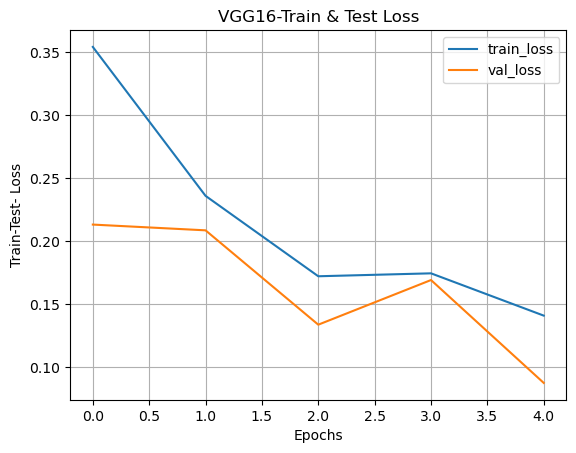

<Figure size 640x480 with 0 Axes>

In [15]:
#loss
plt.title('VGG16-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('VGG16--Loss & Val_loss')

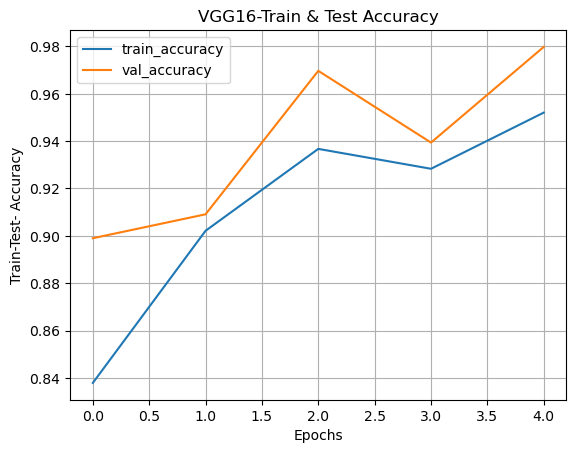

<Figure size 640x480 with 0 Axes>

In [16]:
#Accuracy
plt.title('VGG16-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('VGG16--Accuracy & Val_accuracy')

In [17]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg16_dog_cat_classify.h5')
model.save('vgg16_dog_cat_classify.keras')

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

4/4 [==============================] - 44s 9s/step
Confusion Matrix
[[23 26]
 [27 23]]
Classification Report
              precision    recall  f1-score   support

         cat       0.46      0.47      0.46        49
         dog       0.47      0.46      0.46        50

    accuracy                           0.46        99
   macro avg       0.46      0.46      0.46        99
weighted avg       0.46      0.46      0.46        99

Accuracy Score
0.46464646464646464


<Axes: >

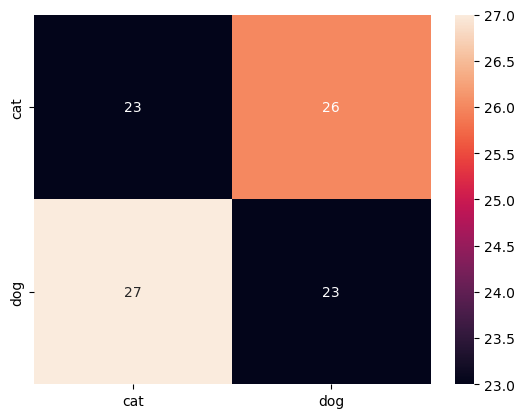

In [20]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['cat','dog'],
 yticklabels=['cat','dog'])